# ANN for classification of MNIST Dataset

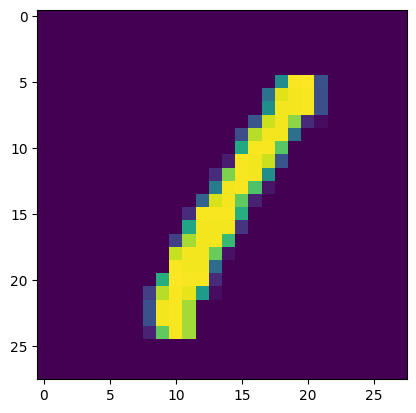

In [3]:
import warnings 
warnings.filterwarnings('ignore')
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 10
(x_train,y_train), (x_test,y_test) = mnist.load_data()
plt.imshow(x_train[3])
plt.show()

- ### Converting all the values in the array in the range of 0 to 1 for better training by the neural network.

In [4]:
x_train = x_train/255
x_test = x_test/255

### Making the artificial neural network

In [6]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
## ANN with 2 hidden layers

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

- ### If we use sparse_categorical_crossentropy we need not one hot encode the output variable , whereas if we use categorical_crossentropy we need to one hot encode the output variable

In [10]:
history = model.fit(x_train,y_train, batch_size = batch_size, epochs = 10, validation_split=0.2, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7917 - loss: 0.7107 - val_accuracy: 0.9442 - val_loss: 0.1980
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9502 - loss: 0.1730 - val_accuracy: 0.9588 - val_loss: 0.1503
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9642 - loss: 0.1223 - val_accuracy: 0.9643 - val_loss: 0.1238
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9723 - loss: 0.0939 - val_accuracy: 0.9681 - val_loss: 0.1107
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9797 - loss: 0.0696 - val_accuracy: 0.9710 - val_loss: 0.1044
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9823 - loss: 0.0596 - val_accuracy: 0.9720 - val_loss: 0.0984
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9870 - loss: 0.0440 - val_accuracy: 0.9722 - val_loss: 0.1001
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9892 - loss: 0.0373 - val_accuracy: 0.

In [11]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [12]:
from sklearn.metrics import accuracy_score
print(f"Accuracy:{accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy:97.54%


### Checking the results

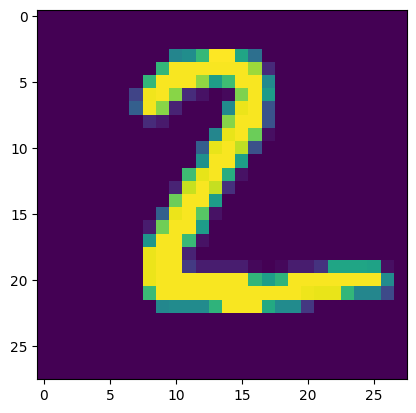

In [13]:
plt.imshow(x_test[1])
plt.show()

In [14]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([2])